In [1]:
import sys
sys.path.append("../../scripts/")
from plt_config import use_latex, TU_GREY, TU_RED
import matplotlib.pyplot as plt
use_latex()
data_folder = "plot_data"

# Initial loss for first training without data augmentation

In [2]:
import pickle, os
with open(os.path.join(data_folder, "MGNN_pcseg1_simple.history"), "rb") as f: 
    history = pickle.load(f)

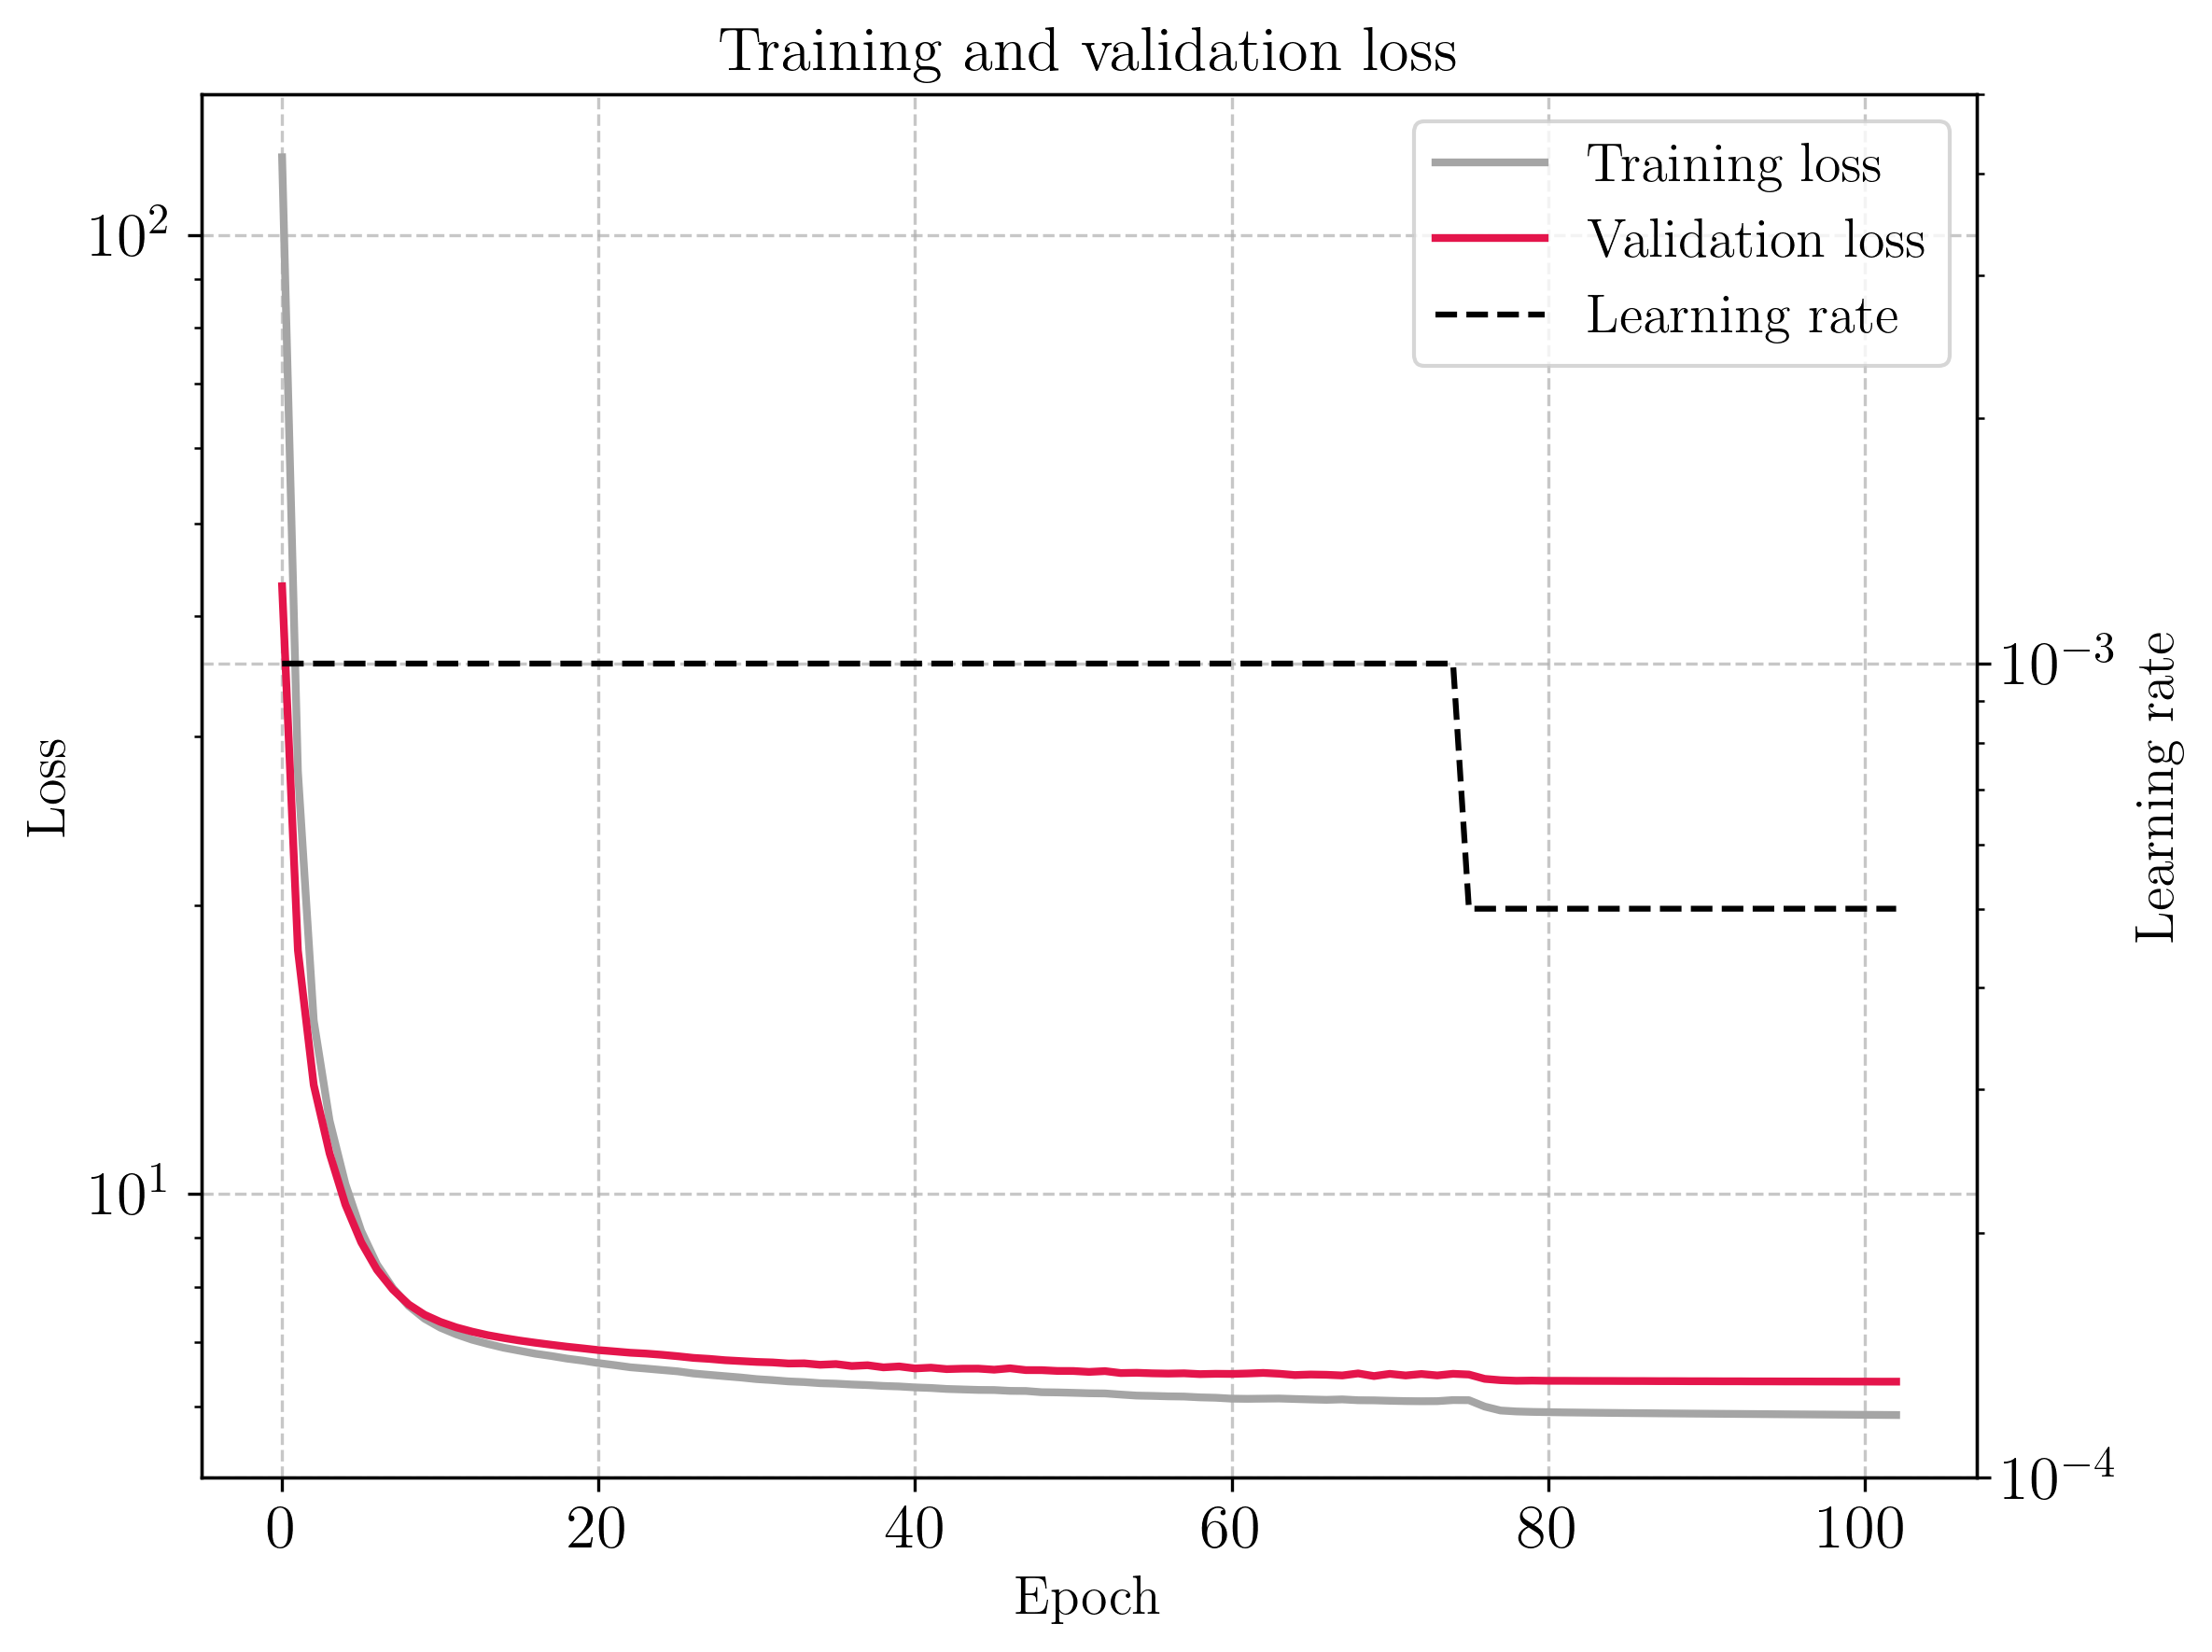

In [18]:
tr_loss = history["train_loss"]
val_loss = history["val_loss"]
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(tr_loss, label="Training loss", color=TU_GREY, linewidth=2)
ax.plot(val_loss, label="Validation loss", color=TU_RED, linewidth=2)
ax.set_xlabel("Epoch", fontsize=14)
ax.set_ylabel("Loss", fontsize=14)
ax.set_title("Training and validation loss", fontsize=16)
ax.set_yscale("log")
ax.grid(True, linestyle='--', alpha=0.7)

ax2 = ax.twinx()
ax2.plot(history["lr"], label="Learning rate", color="black", linestyle='--', linewidth=1.5)
ax2.set_ylabel("Learning rate", fontsize=14)
ax2.set_yscale("log")
ax2.set_ylim(1e-4, 5*1e-3)
ax2.tick_params(axis='y')

# Combine legends from both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, fontsize=14, loc='upper right')

plt.tight_layout()
plt.savefig("../../fig/gnn/mgnn_pcseg1_simple_loss.pdf", bbox_inches='tight')